Q1] What is Simple Linear Regression?  
Ans] Simple Linear Regression (SLR) is a statistical method used to model the relationship between two variables — one independent (predictor) and one dependent (response) — by fitting a straight line through the data points.  
Simple Linear Regression estimates how the dependent variable (Y) changes when the independent variable (X) changes by one unit.  

Mathematically, it’s expressed as:  
Y=b0​+b1​X+ε  
Y → Dependent variable (what you want to predict)  
X → Independent variable (predictor)  
b₀ → Intercept (value of Y when X = 0)  
b₁ → Slope (change in Y for one-unit change in X)  
ε (epsilon) → Error term (difference between actual and predicted values)  
Example:  
Suppose we want to predict Salary (Y) based on Years of Experience (X).  
Regression equation might be:  
Salary=25,000+5,000×(Years of Experience)  
This means:  
Base salary (no experience) = ₹25,000  
Each additional year of experience adds ₹5,000 to salary.  
Evaluation Metrics:  
R² (Coefficient of Determination) – How much variance in Y is explained by X.  
MSE / RMSE – Measure prediction error.  
p-value for b₁ – Tests if the relationship is statistically significant.  

Q2] What are the key assumptions of Simple Linear Regression?  
Ans] 
1. Linearity  
The relationship between the independent variable (X) and the dependent variable (Y) must be linear.  
Mathematically:  E(Y∣X)=b0​+b1​X  
Check using: Scatter plot of X vs Y — points should roughly form a straight-line pattern.  

2. Independence of Errors  
The residuals (errors) must be independent of each other — no autocorrelation.  
Violation occurs in time series data when one error depends on the previous one.  
Check using: Durbin–Watson test (value should be around 2).  

3. Homoscedasticity  
The variance of the residuals should be constant across all levels of X.  
That means the spread of errors is similar for small and large values of X.  
If not, it’s called heteroscedasticity, which can distort predictions.  
Check using: Plot of residuals vs predicted values — should show a random scatter, not a funnel shape.  

4. Normality of Errors  
The residuals should be normally distributed (bell-shaped curve).  
Important for hypothesis testing and confidence intervals.  
Check using: Histogram or Q–Q plot of residuals.  

5. No or Minimal Multicollinearit  
In simple linear regression, there’s only one predictor, so this is naturally satisfied.  
(This assumption is more relevant in multiple linear regression.)  

Q3] What is heteroscedasticity, and why is it important to address in regression
models?  
Ans] Heteroscedasticity occurs when the variance of the residuals (errors) in a regression model is not constant across all levels of the independent variable(s).  
In simpler terms: The spread of the errors changes depending on the value of the predictor(s).  
Opposite case: Homoscedasticity → residuals have constant variance.  
Violates regression assumptions  
Linear regression assumes constant variance of errors (homoscedasticity).  
Violation can make statistical tests invalid.  
Affects standard errors  
Coefficients (b₀, b₁, …) remain unbiased.  
But standard errors become incorrect, leading to:  
Misleading p-values  
Incorrect confidence intervals  
Impacts model reliability  
Predictions might still work reasonably, but inference about the effect of predictors becomes unreliable.  


Q4] What is Multiple Linear Regression?  
Ans] Multiple Linear Regression (MLR) is an extension of Simple Linear Regression, where we model the relationship between one dependent variable and two or more independent variables.  
Multiple Linear Regression predicts the value of a dependent variable (
𝑌) based on multiple predictors using a linear equation:
Y=b0​+b1​X1​+b2​X2​+⋯+bn​Xn​+ε  
Predictor Variables: Can be continuous or categorical (categorical variables are usually one-hot encoded).  
Linear Relationship: Assumes a linear relationship between predictors and target.  
Evaluation Metrics:  
R² / Adjusted R² → How well predictors explain variation in Y  
RMSE / MAE → Prediction accuracy  
p-values for coefficients → Statistical significance of each predictor  



Q5] What is polynomial regression, and how does it differ from linear
regression?  
Ans] Polynomial Regression is a type of regression used to model nonlinear relationships between the independent variable(s) and the dependent variable.  
It’s essentially Linear Regression on transformed features, where you add polynomial terms (powers of X) as new predictors.  
Relationship Modeled  
Linear: Models a straight-line (linear) relationship between X and Y.  
Polynomial: Models a nonlinear relationship (curved) between X and Y.  

Features Used  
Linear: Only the original predictor(s) (X).  
Polynomial: Original predictor(s) + polynomial terms  

Shape of Fit  
Linear: Straight line.  
Polynomial: Curve (parabola, cubic, etc.)  

Use Case  
Linear: Data follows an approximately straight trend.  
Polynomial: Data shows curvature or accelerating/decelerating trends.  

Complexity  
Linear: Simple, fewer parameters, low risk of overfitting.  
Polynomial: More complex, higher-degree polynomials can overfit.  

Interpretation  
Linear: Coefficients are easier to interpret.  
Polynomial: Coefficients are harder to interpret individually, especially higher-degree terms.  

6] Implement a Python program to fit a Simple Linear Regression model to
the following sample data:  
● X = [1, 2, 3, 4, 5]  
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]  

Intercept (b0): 5.366666666666667
Slope (b1): 2.4231685933393132


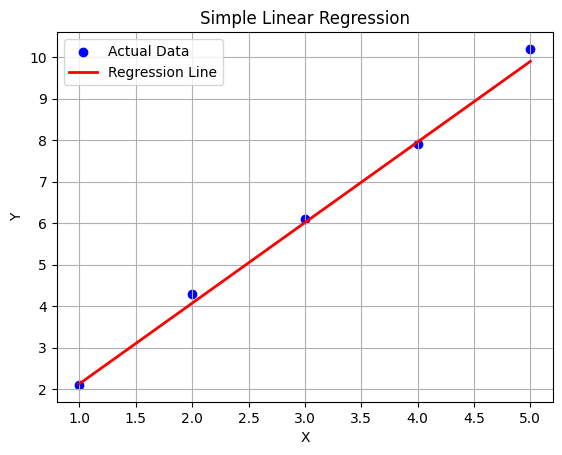

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Initialize
scalar = StandardScaler()
model = LinearRegression()

# Data
X = np.array([[1], [2], [3], [4], [5]])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Scale features
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Fit model
model.fit(X_train_scaled, y_train)

# Predict for all X (to plot full regression line)
X_scaled_all = scalar.transform(X)
Y_pred_all = model.predict(X_scaled_all)

# Print model parameters
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

# Plot actual data points
plt.scatter(X, Y, color='blue', label='Actual Data')

# Plot regression line across full X range
plt.plot(X, Y_pred_all, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:  
● Area = [1200, 1500, 1800, 2000]  
● Rooms = [2, 3, 3, 4]  
● Price = [250000, 300000, 320000, 370000]  
Check for multicollinearity using VIF and report the results.  


In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample Data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)


print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)


X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)


Intercept (b0): 103157.89473684214
Coefficients (b1, b2): [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF) Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Question 8: Implement polynomial regression on the following data:  
● X = [1, 2, 3, 4, 5]  
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]  
Fit a 2nd-degree polynomial and plot the resulting curve.  

Model Coefficients: [0.   1.94 0.2 ]
Model Intercept: 0.06000000000000938


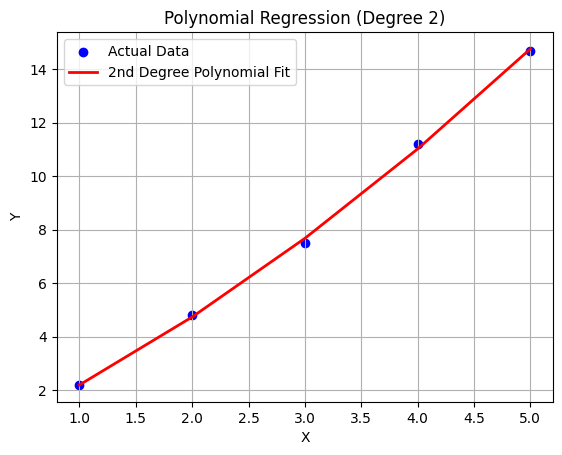

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Given Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create Polynomial Features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values for plotting
Y_pred = model.predict(X_poly)

# Display model parameters
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Plot original data points
plt.scatter(X, Y, color='blue', label='Actual Data')

# Plot polynomial regression curve
plt.plot(X, Y_pred, color='red', linewidth=2, label='2nd Degree Polynomial Fit')

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.grid(True)
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:  
● X = [10, 20, 30, 40, 50]  
● Y = [15, 35, 40, 50, 65]  
Assess heteroscedasticity by examining the spread of residuals.  


Intercept (b0): 6.499999999999993
Slope (b1): 1.1500000000000001
Residuals: [-3.   5.5 -1.  -2.5  1. ]


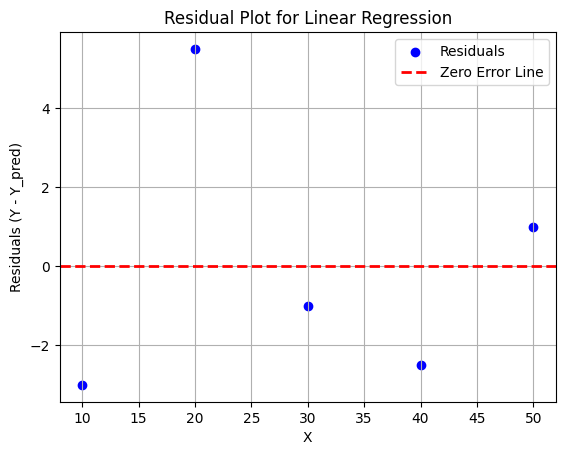

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Compute residuals
residuals = Y - Y_pred

# Print model info
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])
print("Residuals:", residuals)


plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
plt.xlabel("X")
plt.ylabel("Residuals (Y - Y_pred)")
plt.title("Residual Plot for Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.  
Ans]  
Step 1: Detect and Confirm Issues  
Heteroscedasticity  
Check visually: Plot residuals vs predicted values.  
Statistical tests:  
Breusch–Pagan test  
White’s test  

Multicollinearity  
Check using VIF (Variance Inflation Factor):  
VIF > 5 (or 10) → high multicollinearity  
Check correlation matrix: Identify highly correlated features  

Step 2: Handle Multicollinearity  
Remove or combine correlated features  
Example: If Area and Number of Rooms are highly correlated, consider dropping one or creating a composite feature.  
Use dimensionality reduction  
Principal Component Analysis (PCA) to transform correlated features into uncorrelated components  
Regularization techniques  
Ridge Regression (L2) → reduces coefficient variance  
Lasso Regression (L1) → can shrink some coefficients to zero  

Step 3: Handle Heteroscedasticity  
Transform the dependent variable  
Common transformations: log(Price), sqrt(Price)  
Stabilizes variance of residuals  
Weighted Least Squares (WLS)  
Assign weights inversely proportional to the variance of errors  
Gives less importance to observations with high variance  
Robust standard errors  
Use Huber–White or Newey–West corrections for more reliable inference  

Step 4: Feature Engineering for Location  
Encode Location properly:  
One-hot encoding for categorical locations  
Avoid dummy variable trap to prevent artificial multicollinearity  

Step 5: Model Validation  
Split data into train/test sets  
Use cross-validation to check model stability  
Evaluate using:  
R² / Adjusted R² → fit quality  
RMSE / MAE → predictive accuracy  
Residual plots → check for remaining heteroscedasticity  